# Regression Analysis Notebook

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
# Load cleaned data
cleaned_file_path = './data/population_trends_cleaned.csv'
data = pd.read_csv(cleaned_file_path)

# Prepare data for regression
eda_data = data[data['Category'] == '출생아수(명)'].set_index('Category').transpose()
years = pd.DataFrame({'Year': range(2014, 2024)})
birth_counts = eda_data.loc[:, '출생아수(명)'].values

# Add a constant for the intercept
X = sm.add_constant(years)
ols_model = sm.OLS(birth_counts, X).fit()

# Print the summary
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     230.3
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           3.52e-07
Time:                        16:33:04   Log-Likelihood:                -109.34
No. Observations:                  10   AIC:                             222.7
Df Residuals:                       8   BIC:                             223.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.149e+07   3.37e+06     15.274      0.0

C:\Users\HyperPC\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


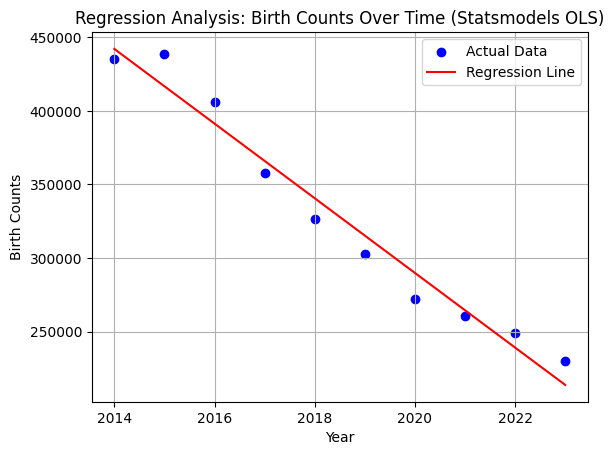

In [5]:

# Visualize the regression results
plt.scatter(years, birth_counts, color='blue', label='Actual Data')
plt.plot(years, ols_model.predict(X), color='red', label='Regression Line')
plt.title('Regression Analysis: Birth Counts Over Time (Statsmodels OLS)')
plt.xlabel('Year')
plt.ylabel('Birth Counts')
plt.legend()
plt.grid(True)
plt.show()
